<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 10, 2016: `inverse` and `power` $g$ polys
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to a symbolic Riordan array $\mathcal{R}$ defined by convolutions.
</div>

In [2]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [3]:
%run ../../src/matrix_functions.py

# $\mathcal{R}$ is a symbolic Riordan array

In [4]:
m = 8

d_fn, h_fn = Function('d'), Function('h')
d, h = IndexedBase('d'), IndexedBase('h')

d_series = define(let=d_fn(t), be=sum(d[i]*t**i for i in range(m))).subs({d[0]:1})
h_series = define(let=h_fn(t), be=t*sum(h[i]*t**i for i in range(m-1))).expand().subs({h[0]:1})

d_series, h_series

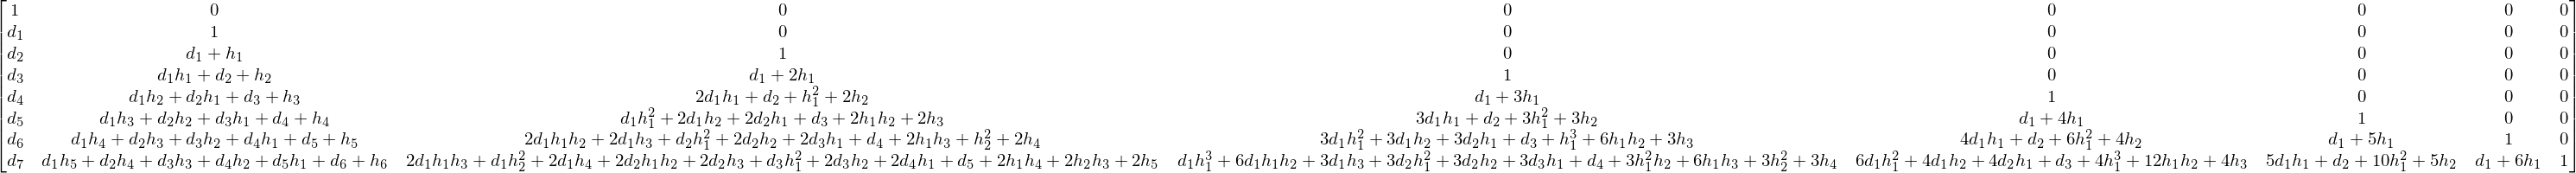

In [5]:
R = Matrix(m, m, riordan_matrix_by_convolution(d_series, h_series, t))
R

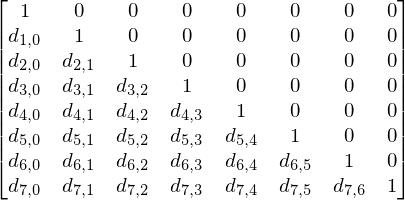

In [68]:
d = IndexedBase('d')
R = Matrix(m, m, lambda n, k: 1 if n==k else d[n,k] if k in range(n+1) else 0)
R

In [6]:
data, eigenvals, multiplicities = eigendata = eigen_data(R)
eigendata

In [7]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

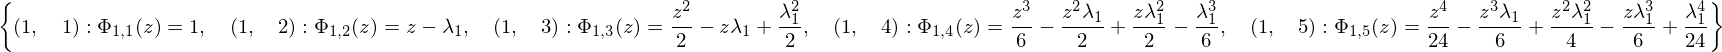

In [94]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

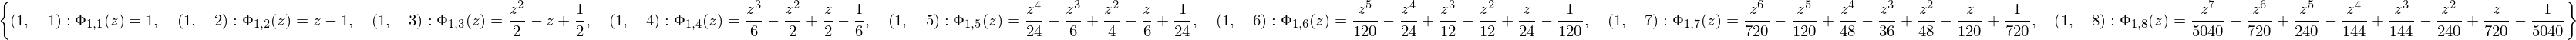

In [10]:
{k:v.subs(eigenvals) for k, v in Phi_polynomials.items()}

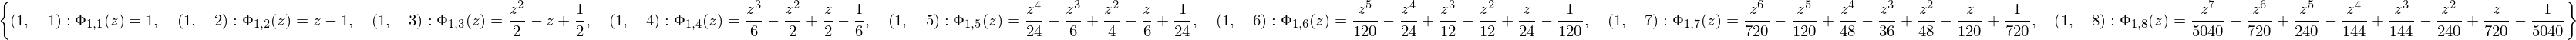

In [8]:
Phi_polynomials = component_polynomials_riordan(degree=m) # actually, degree should be $m-1$
Phi_polynomials

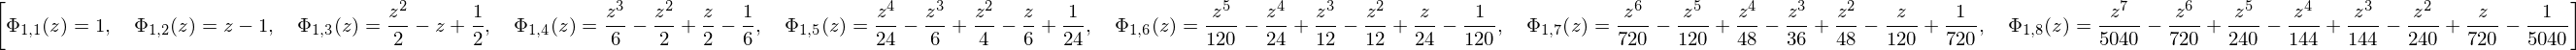

In [9]:
[Phi_polynomials[1,i] for i in range(1, m+1)]

have a look at [A098361][a] in the OEIS:

[a]:http://oeis.org/A098361

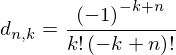

In [51]:
d = IndexedBase('d')
define(let=d[n,k], be=(-1)**(n-k)/(factorial(n-k)*factorial(k)))

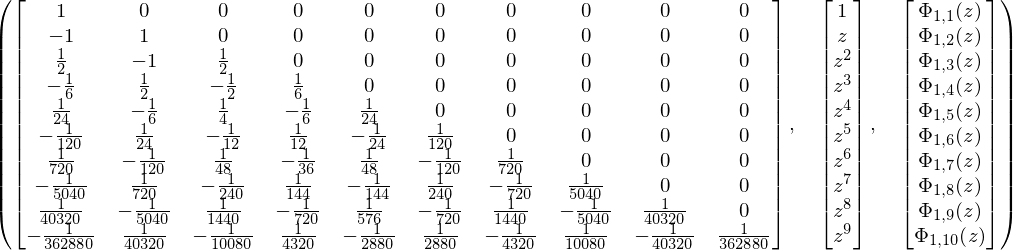

In [56]:
res_ordinary = M_ordinary, z_ordinary, Phi_ordinary = (
    Matrix(m, m, lambda n,k: (-1)**(n-k)/(factorial(n-k)*factorial(k)) if n-k >= 0 else 0),
    Matrix([z**i for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_ordinary

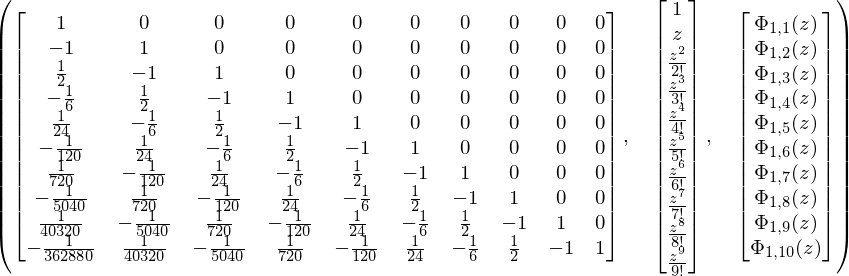

In [57]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(m, m, lambda n,k: (-1)**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_expt

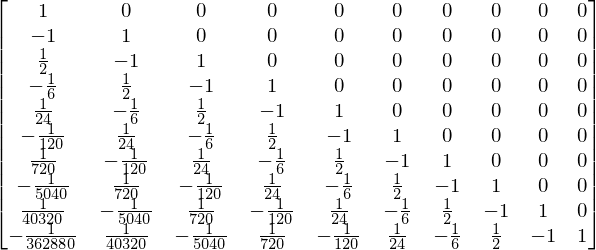

In [58]:
M_expt

In [59]:
Eq(M_ordinary*z_ordinary, M_expt*z_expt).simplify()

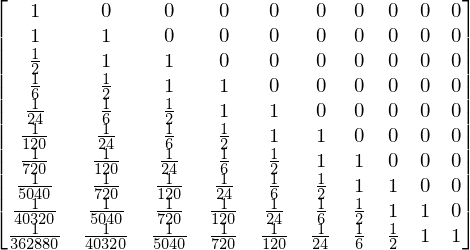

In [60]:
M_expt**(-1)

In [97]:
Z = IndexedBase('Z')

cmatrices = component_matrices(R, Phi_polynomials)
# {Z[k]:v for k,v in cmatrices.items()} # all of them

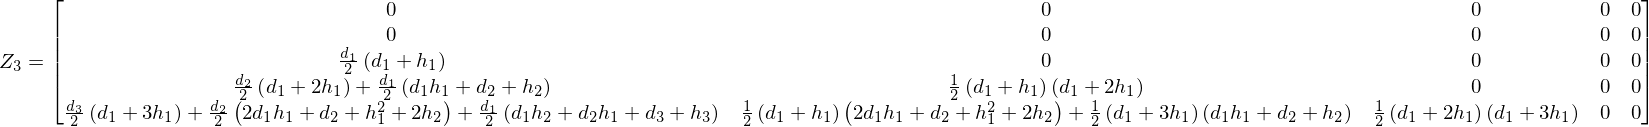

In [98]:
j=3
define(let=Z[j], be=cmatrices[1,j], evaluate=False)

# `inverse` function

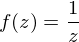

In [10]:
f = Function('f')
f_inverse = define(let=f(z), be=1/z)
f_inverse

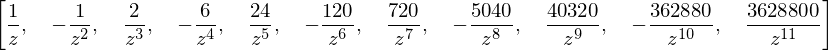

In [11]:
[f_inverse.rhs.diff(z, i) for i in range(11)]

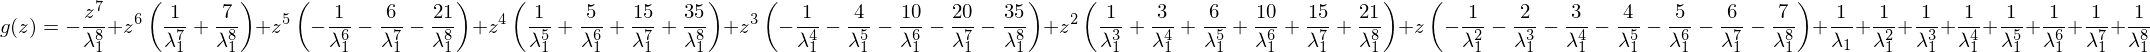

In [12]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [13]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

In [14]:
horner(g_inverse.rhs)

Checks *Equation (1)* in the note:

In [16]:
gg = define(let=Function('g')(z), be=sum(binomial(j-1, k)*(-z)**k for j in range(1, m+1) for k in range(j)))
gg

In [17]:
Eq(g_inverse.rhs, gg.rhs)

Checks *Equation (2)* in the note:

In [19]:
ggg = define(let=Function('g')(z), be=sum(binomial(m, k+1)*(-z)**(k) for k in range(m)))
ggg

In [20]:
Eq(g_inverse.rhs, ggg.rhs)

# `power` function

In [21]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

In [22]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
#g_power

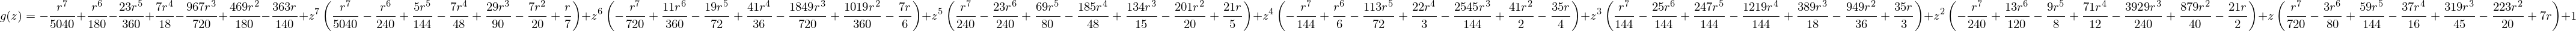

In [23]:
g_power = g_power.subs(eigenvals)
g_power

Checks *Equation (3)* in the note:

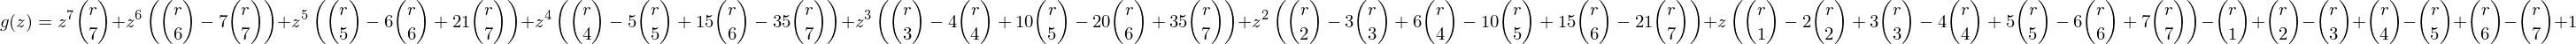

In [24]:
gg = define(let=Function('g')(z), be=sum((-1)**(j-1)*binomial(r, j-1)*binomial(j-1, k)*(-z)**k 
                                    for j in range(1, m+1) 
                                    for k in range(j)).collect(z))
gg

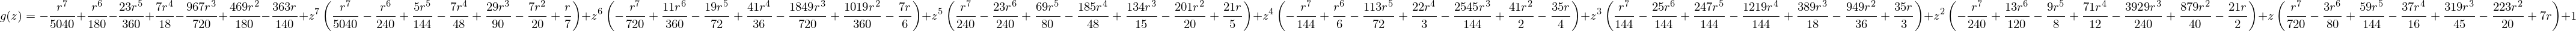

In [137]:
define(let=Function('g')(z), be=gg.rhs.combsimp().collect(z))

In [25]:
Eq(g_power.rhs, gg.rhs).simplify()

Checks *Equation (4)* in the note:

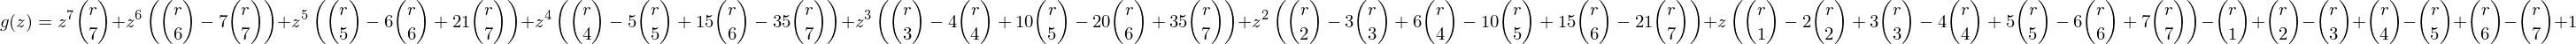

In [26]:
ggg = define(let=Function('g')(z), be=sum((-1)**(j)*binomial(r, j)*binomial(j, k)*(-z)**k 
                                    for k in range(m) 
                                    for j in range(k, m)).collect(z))
ggg

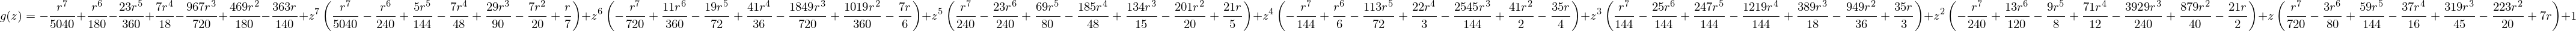

In [140]:
define(let=Function('g')(z), be=ggg.rhs.combsimp().collect(z))

In [27]:
Eq(g_power.rhs, ggg.rhs).simplify()

Checks *Equation (5)* in the note:

the following is an attempt to factor out $(r)_{(8)}$ at denominator, *skip it at checking time*:

In [164]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(r, 8)/ff(r, 8)))
gggg.rhs.combsimp().collect(z)

the following is an equivalent $g$ polynomial where we've factored out a common term, *therefore paste $g$ in your document, multiplying it by $8{{r}\choose{8}}$*:

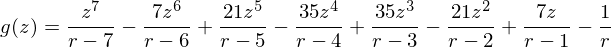

In [173]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(r, 8)))
gggg.expand()#.rhs.combsimp().collect(z)

checking cell:

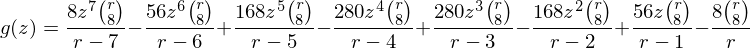

In [28]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z))
gggg

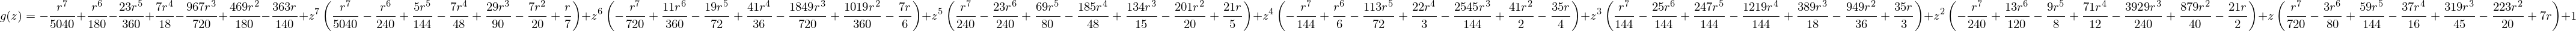

In [169]:
define(let=Function('g')(z), be=gggg.rhs.combsimp().collect(z))

In [29]:
Eq(g_power.rhs, gggg.rhs).simplify()

Checks *Equation (6)* in the note:

the following is an equivalent $g$ polynomial where we've factored out a common term, *therefore paste $g$ in your document, multiplying it by $8{{7-r}\choose{8}}$*:

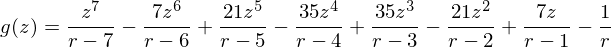

In [179]:
ggggg = define(let=Function('g')(z), be=sum((k-m)/(r-k)*binomial(m, k)*binomial(m-r-1, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(7-r, 8)))
ggggg.expand()

Checking cell:

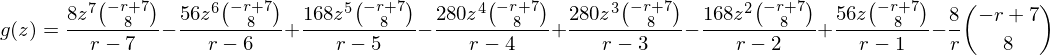

In [30]:
ggggg = define(let=Function('g')(z), be=sum((k-m)/(r-k)*binomial(m, k)*binomial(m-r-1, m)*(-z)**k 
                                    for k in range(m)).collect(z))
ggggg

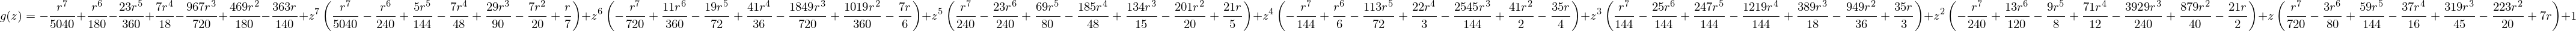

In [181]:
define(let=Function('g')(z), be=ggggg.rhs.combsimp().collect(z))

In [31]:
Eq(g_power.rhs, ggggg.rhs).simplify()

---

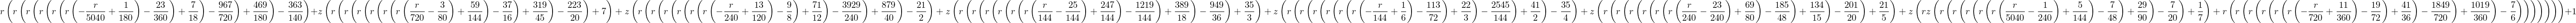

In [118]:
horner(g_power.rhs, wrt=z)

# `sqrt` function

In [37]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

In [49]:
order = 10

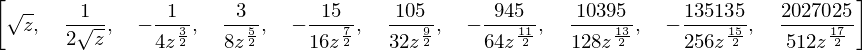

In [50]:
[f_sqrt.rhs.diff(z, j) for j in range(order)]

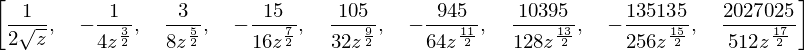

In [51]:
[(-1)**n*factorial(2*(n))/(factorial(n)*2**n)/(2**(n+1)*z**((2*n+1)/S(2))) for n in range(order-1)]

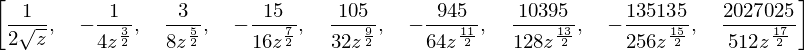

In [52]:
[(-1)**n*factorial(2*(n))/(factorial(n)*4**n)/(2*z**((2*n+1)/S(2))) for n in range(order-1)]

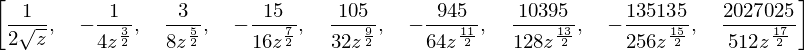

In [53]:
[(-1)**n*binomial(2*n, n)*factorial(n)/(2*4**n)/(z**((2*n+1)/S(2))) for n in range(order-1)]

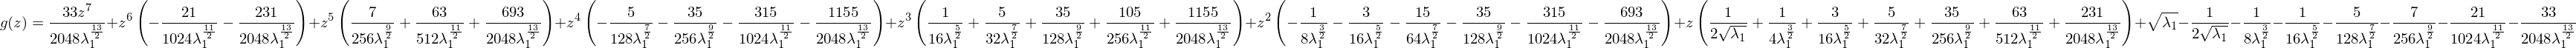

In [33]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

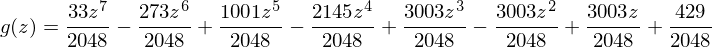

In [58]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

Checking *Equation 7*

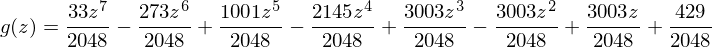

In [61]:
gg = define(Function('g')(z), 1 + sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k)
                                      for j in range(1, m) for k in range(j+1))/2) 
      
gg

In [62]:
Eq(g_sqrt.rhs, gg.rhs)

Checking *Equation 8*

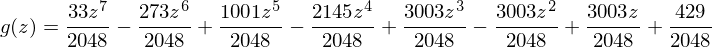

In [63]:
ggg = define(Function('g')(z), 1 + 
       sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k) 
           for k in range(1,m)
           for j in range(k, m))/2 
      + sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1) for j in range(1,m))/S(2))
ggg

In [64]:
Eq(g_sqrt.rhs, ggg.rhs)

Checking *Equation 9*

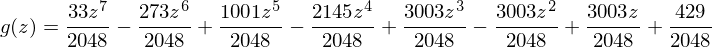

In [68]:
gggg = define(Function('g')(z), 1 + 
       sum(-S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k) 
           for k in range(m)
           for j in range(k+KroneckerDelta(k,0), m))/2)
gggg

In [69]:
Eq(g_sqrt.rhs, gggg.rhs)

Checking *Equation 10*

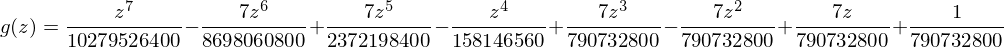

In [71]:
ggggg = define(Function('g')(z), S(2)/(4**m*(2*m-1)*binomial(2*m, m))*
              sum(S(k-m)/(2*k-1)*binomial(m, k)*(-z)**(k) for k in range(1,m))
              + S(2)*m/(4**m*(2*m-1)*binomial(2*m, m)))
ggggg

In [69]:
Eq(g_sqrt.rhs, gggg.rhs)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.